
#Tugas Cloud Computing dengan Google Collab#
#####Nama : Novi Yuningsih
#####NIM : 09011281823133
#####Kelas : SK7B Indralaya
###Topik :
        Mengklasifikasi Cupcake dan Muffin


###Variabel :
        Bahan-bahan resep pembuatan Cupcake dan Muffin


###Metode yang dipakai :
        Support Vector Machine
Pertama, definisikan dahulu library yang akan dipakai.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm

Jangan lupa juga library untuk gambar grafiknya.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline


###Input atau masukkan dataset yang akan digunakan.
   Dalam hal ini saya menggunakan dataset yang didownload dari laman :

   https://github.com/Michelmj/CUPCAKE-vs-MUFFIN/blob/master/RecipesMuffinsCupcakes.xlsx 

   Bentuk file datasetnya adalah file Microsoft Excel.
File dataset ini diimport dari penyimpanan online yaitu Google Drive.

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
cupmuf = pd.read_excel('/content/gdrive/MyDrive/Dataset/RecipesMuffinsCupcakes.xlsx')


Library yang dipakai untuk menampilkan bentuk datanya adalah pandas(yang sudah diimport sebelumnya).
#####Variabel pada dataset tersebut antara lain yaitu Flour = ons , Milk = liter, Egg = butir, Butter = gram dsb

In [15]:
cupmuf

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0



Kita juga perlu melihat bagaimana nilai pada variabel-variabel yang ada tadi dalam bentuk grafik.
#####Berikut adalah gambar grafik perbandingan variabel Sugar dan Flour.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


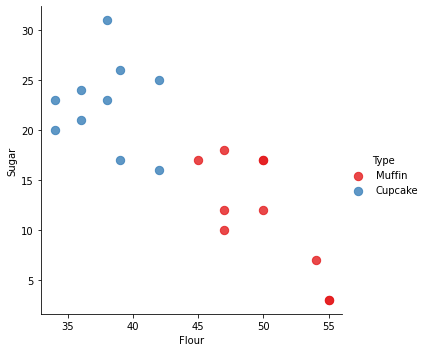

In [16]:
sns.lmplot('Flour', 'Sugar', data = cupmuf, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70});


Muffin = 0
#####Cupcake = 1
#####Library yang dipakai untuk menampilkan point point diatas adalah numpy(yang sudah diimport sebelumnya).

In [17]:
type_label = np.where(cupmuf['Type']=='Muffin', 0, 1)
cupmuf_feat = cupmuf.columns.values[1:].tolist()
cupmuf_feat

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']


Diatas merupakan perintah untuk menampilkan nama-nama variabelnya.
#####Untuk menampilkan nilai Flour dan Sugar seperti berikut.

In [18]:
cpmfingr = cupmuf[['Flour', 'Sugar']].values
print(cpmfingr)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


Menyederhanakan data hingga hanya nampak nilainya saja untuk semua variabel seperti berikut.

In [19]:
cpmfingrs = cupmuf[cupmuf_feat].values
print(cpmfingrs)

[[55 28  3  7  5  2  0  0]
 [47 24 12  6  9  1  0  0]
 [47 23 18  6  4  1  0  0]
 [45 11 17 17  8  1  0  0]
 [50 25 12  6  5  2  1  0]
 [55 27  3  7  5  2  1  0]
 [54 27  7  5  5  2  0  0]
 [47 26 10 10  4  1  0  0]
 [50 17 17  8  6  1  0  0]
 [50 17 17 11  4  1  0  0]
 [39  0 26 19 14  1  1  0]
 [42 21 16 10  8  3  0  0]
 [34 17 20 20  5  2  1  0]
 [39 13 17 19 10  1  1  0]
 [38 15 23 15  8  0  1  0]
 [42 18 25  9  5  1  0  0]
 [36 14 21 14 11  2  1  0]
 [38 15 31  8  6  1  1  0]
 [36 16 24 12  9  1  1  0]
 [34 17 23 11 13  0  1  0]]


Menampilkan data yang akan dibandingkan yaitu Flour dan Sugar(dalam bentuk array).

In [20]:
ingredients = cupmuf[['Flour', 'Sugar']].values
ingredients

array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]])


Langkah selanjutnya yaitu menyesuaikan model kebentuk SVM.
#####Library yang dipakai adalah sklearn(yang sudah diimport sebelumnya).

In [21]:
cupmufel = svm.SVC(kernel='linear')
cupmufel.fit(ingredients, type_label)

SVC(kernel='linear')

Menghitung skor Cross Validationnya.

In [22]:
from sklearn.model_selection import cross_val_score
score_svc = cross_val_score(cupmufel, ingredients, type_label, cv=4)
print("Cross Validation score : " + str(score_svc))

Cross Validation score : [0.8 1.  0.8 1. ]


Membuat hyperplane pemisah(1).

In [23]:
cm = cupmufel.coef_[0]
a = -cm[0] / cm[1]
xx = np.linspace(30, 60)
yy = a * xx - (cupmufel.intercept_[0]) / cm[1]
print(yy)

# plot parallel dengan garis hyperplane
cc = cupmufel.support_vectors_[0]
yy_down = a * xx + (cc[1] - a * cc[0])
mm = cupmufel.support_vectors_[-1]
yy_up = a * xx + (mm[1] - a * mm[0])

[ 1.15779472e+16  1.10528750e+16  1.05278028e+16  1.00027306e+16
  9.47765844e+15  8.95258624e+15  8.42751405e+15  7.90244185e+15
  7.37736965e+15  6.85229746e+15  6.32722526e+15  5.80215306e+15
  5.27708087e+15  4.75200867e+15  4.22693647e+15  3.70186428e+15
  3.17679208e+15  2.65171988e+15  2.12664769e+15  1.60157549e+15
  1.07650329e+15  5.51431096e+14  2.63588995e+13 -4.98713297e+14
 -1.02378549e+15 -1.54885769e+15 -2.07392989e+15 -2.59900208e+15
 -3.12407428e+15 -3.64914648e+15 -4.17421867e+15 -4.69929087e+15
 -5.22436307e+15 -5.74943526e+15 -6.27450746e+15 -6.79957966e+15
 -7.32465185e+15 -7.84972405e+15 -8.37479625e+15 -8.89986844e+15
 -9.42494064e+15 -9.95001284e+15 -1.04750850e+16 -1.10001572e+16
 -1.15252294e+16 -1.20503016e+16 -1.25753738e+16 -1.31004460e+16
 -1.36255182e+16 -1.41505904e+16]


Membuat hyperplane pemisah(2).

In [24]:
cm = cupmufel.coef_[0]
a = -cm[0] / cm[1]
xx = np.linspace(30, 60)
yy = a * xx - (cupmufel.intercept_[0]) / cm[1]

# plot the parallels to the separating hyperplane
cc = cupmufel.support_vectors_[0]
yy_down = a * xx + (cc[1] - a * cc[0])
mm = cupmufel.support_vectors_[-1]
yy_up = a * xx + (mm[1] - a * mm[0])
print(yy_down)

[ 1.28642688e+16  1.23391966e+16  1.18141244e+16  1.12890522e+16
  1.07639800e+16  1.02389078e+16  9.71383564e+15  9.18876344e+15
  8.66369124e+15  8.13861905e+15  7.61354685e+15  7.08847465e+15
  6.56340246e+15  6.03833026e+15  5.51325806e+15  4.98818587e+15
  4.46311367e+15  3.93804147e+15  3.41296928e+15  2.88789708e+15
  2.36282488e+15  1.83775269e+15  1.31268049e+15  7.87608295e+14
  2.62536098e+14 -2.62536098e+14 -7.87608295e+14 -1.31268049e+15
 -1.83775269e+15 -2.36282488e+15 -2.88789708e+15 -3.41296928e+15
 -3.93804147e+15 -4.46311367e+15 -4.98818587e+15 -5.51325806e+15
 -6.03833026e+15 -6.56340246e+15 -7.08847465e+15 -7.61354685e+15
 -8.13861905e+15 -8.66369124e+15 -9.18876344e+15 -9.71383564e+15
 -1.02389078e+16 -1.07639800e+16 -1.12890522e+16 -1.18141244e+16
 -1.23391966e+16 -1.28642688e+16]


Membuat hyperplane pemisah(3).

In [25]:
cm = cupmufel.coef_[0]
a = -cm[0] / cm[1]
xx = np.linspace(30, 60)
yy = a * xx - (cupmufel.intercept_[0]) / cm[1]
print(yy)

# plot the parallels to the separating hyperplane
cc = cupmufel.support_vectors_[0]
yy_down = a * xx + (cc[1] - a * cc[0])
mm = cupmufel.support_vectors_[-1]
yy_up = a * xx + (mm[1] - a * mm[0])

[ 1.15779472e+16  1.10528750e+16  1.05278028e+16  1.00027306e+16
  9.47765844e+15  8.95258624e+15  8.42751405e+15  7.90244185e+15
  7.37736965e+15  6.85229746e+15  6.32722526e+15  5.80215306e+15
  5.27708087e+15  4.75200867e+15  4.22693647e+15  3.70186428e+15
  3.17679208e+15  2.65171988e+15  2.12664769e+15  1.60157549e+15
  1.07650329e+15  5.51431096e+14  2.63588995e+13 -4.98713297e+14
 -1.02378549e+15 -1.54885769e+15 -2.07392989e+15 -2.59900208e+15
 -3.12407428e+15 -3.64914648e+15 -4.17421867e+15 -4.69929087e+15
 -5.22436307e+15 -5.74943526e+15 -6.27450746e+15 -6.79957966e+15
 -7.32465185e+15 -7.84972405e+15 -8.37479625e+15 -8.89986844e+15
 -9.42494064e+15 -9.95001284e+15 -1.04750850e+16 -1.10001572e+16
 -1.15252294e+16 -1.20503016e+16 -1.25753738e+16 -1.31004460e+16
 -1.36255182e+16 -1.41505904e+16]


Membuat hyperplane pemisah(4).

In [26]:
cm = cupmufel.coef_[0]
a = -cm[0] / cm[1]
xx = np.linspace(30, 60)
yy = a * xx - (cupmufel.intercept_[0]) / cm[1]

# plot the parallels to the separating hyperplane
cc = cupmufel.support_vectors_[0]
yy_down = a * xx + (cc[1] - a * cc[0])
mm = cupmufel.support_vectors_[-1]
yy_up = a * xx + (mm[1] - a * mm[0])
print(yy_up)

[ 1.02914151e+16  9.76634286e+15  9.24127066e+15  8.71619846e+15
  8.19112627e+15  7.66605407e+15  7.14098187e+15  6.61590968e+15
  6.09083748e+15  5.56576528e+15  5.04069309e+15  4.51562089e+15
  3.99054869e+15  3.46547650e+15  2.94040430e+15  2.41533210e+15
  1.89025991e+15  1.36518771e+15  8.40115515e+14  3.15043318e+14
 -2.10028879e+14 -7.35101075e+14 -1.26017327e+15 -1.78524547e+15
 -2.31031767e+15 -2.83538986e+15 -3.36046206e+15 -3.88553426e+15
 -4.41060645e+15 -4.93567865e+15 -5.46075085e+15 -5.98582304e+15
 -6.51089524e+15 -7.03596743e+15 -7.56103963e+15 -8.08611183e+15
 -8.61118402e+15 -9.13625622e+15 -9.66132842e+15 -1.01864006e+16
 -1.07114728e+16 -1.12365450e+16 -1.17616172e+16 -1.22866894e+16
 -1.28117616e+16 -1.33368338e+16 -1.38619060e+16 -1.43869782e+16
 -1.49120504e+16 -1.54371226e+16]


Menampilkan titik-titik atau point sesuai dengan nilai variabel Flour dan Sugar.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


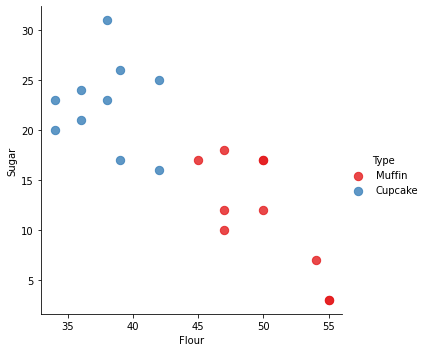

In [27]:
sns.lmplot('Flour', 'Sugar', data = cupmuf, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})


Karena seaborn berada diatas pyplot, jadi pyplot dapat dibuat garis.
#####Kemudian titik-titik akan berada dalam satu garis sesuai dengan jumlah flournya.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


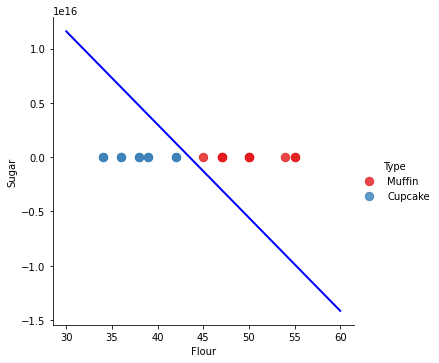

In [28]:
sns.lmplot('Flour', 'Sugar', data = cupmuf, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='blue')

Menambahkan yy_down.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


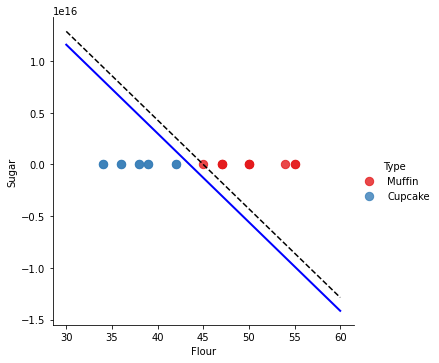

In [29]:
sns.lmplot('Flour', 'Sugar', data = cupmuf, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='blue')
plt.plot(xx, yy_down, 'k--')

Menambahkan yy_up.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


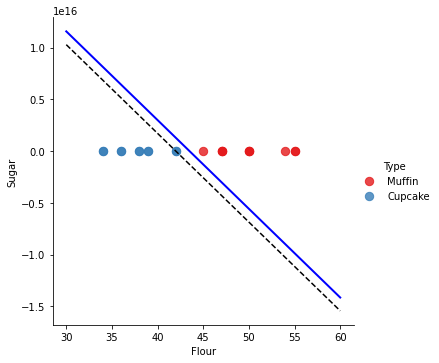

In [30]:
sns.lmplot('Flour', 'Sugar', data = cupmuf, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='blue')
plt.plot(xx, yy_up, 'k--')


Menambahkan yy_up dan menampilkannya dalam grafik.
#####Kemudian akan terlihat jika garis putus-putus akan berada dititik terdekat Miffin dan Cupcake dan garis Hyperplane berada dititik tengah garis putus-putus.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


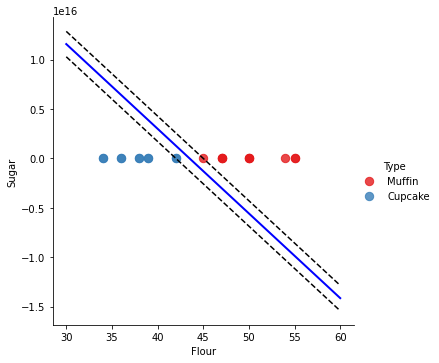

In [31]:
sns.lmplot('Flour', 'Sugar', data = cupmuf, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='blue')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

Langkah ini ialah membuat fungsi yang akan menyeleksi apakah itu resep Muffin atau Cupcake.

In [32]:
def Cupcake_or_Muffin(flour, sugar):
    if(cupmufel.predict([[flour, sugar]]))==0:
        print('Ini adalah resep Muffin')
    else:
        print('Ini adalah resep Cupcake')

Testing jika Flour = 40 dan Sugar = 20, apakah hasilnya?

In [33]:
Cupcake_or_Muffin(40, 20)

Ini adalah resep Cupcake



Jika flour=40 dan sugar=20, maka itu adalah resep cupcake.
#####Berikut merupakan letak titik yang ditesting tadi dalam bentuk grafik.
#####Jawaban ada dititik berwarna kuning yang menandakan bahwa itu termasuk resep cupcake.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


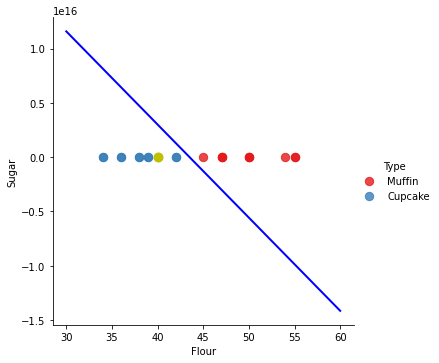

In [34]:
sns.lmplot('Flour', 'Sugar', data = cupmuf, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='blue')
plt.plot(40, 20, 'yo', markersize='9')

Selesai!